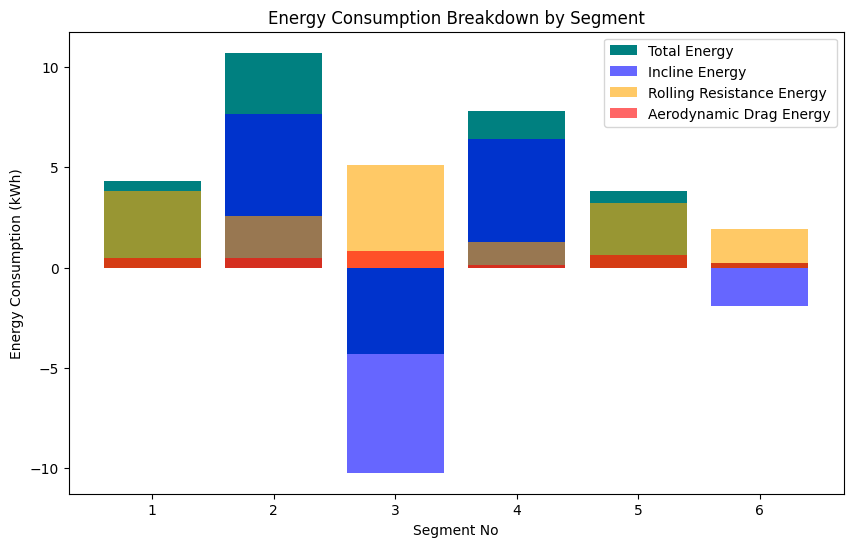

Output()

(   Segment No  Length (m)  Energy Consumption (kWh)  \
 0           1         300                  4.338016   
 1           2         200                 10.715870   
 2           3         400                 -4.312690   
 3           4         100                  7.783913   
 4           5         250                  3.838709   
 5           6         150                  0.230087   
 
    Energy Efficiency (Wh/km)  Incline Energy (kWh)  \
 0               14460.054348              0.000000   
 1               53579.347826              7.677391   
 2              -10781.725543            -10.236522   
 3               77839.130435              6.397826   
 4               15354.836957              0.000000   
 5                1533.913043             -1.919348   
 
    Rolling Resistance Energy (kWh)  Aerodynamic Drag Energy (kWh)  Slope (%)  \
 0                         3.838696                       0.499321        0.0   
 1                         2.559130                      

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Pist segment verisi (Shell Eco-marathon tarzı bir pist)
track_data = pd.DataFrame({
    "Segment No": [1, 2, 3, 4, 5, 6],
    "Length (m)": [300, 200, 400, 100, 250, 150],
    "Slope (%)": [0, 3, -2, 5, 0, -1],
    "Turn Angle (°)": [0, 10, -5, 90, 0, -15]
})

# Araç parametreleri
vehicle_params = {
    "weight_kg": 120,                # Araç + sürücü ağırlığı
    "Cd": 0.25,                      # Aerodinamik sürüklenme katsayısı
    "frontal_area_m2": 0.4,          # Frontal alan
    "Cr": 0.01,                      # Yuvarlanma direnci katsayısı
    "wheel_radius_m": 0.3,           # Tekerlek yarıçapı
    "motor_efficiency": 0.92,        # Motor verimliliği
    "battery_capacity_kWh": 1.2,     # Batarya kapasitesi
    "hydrogen_consumption_g_per_s": 0.04  # Hidrojen tüketimi
}

# Sabitler
g = 9.81  # Yerçekimi (m/s^2)
air_density = 1.225  # Hava yoğunluğu (kg/m^3)

# Hız profili (her segment için farklı hız değerleri)
speed_profile = {
    1: 5,  # Segment 1 için ortalama hız 5 m/s
    2: 6,
    3: 5.5,
    4: 4,
    5: 6.2,
    6: 4.8
}

# Segment başına enerji tüketimi hesaplama
segment_results = []

for _, row in track_data.iterrows():
    # Segment verisi
    length = row["Length (m)"]
    slope = row["Slope (%)"] / 100  # Yokuş eğimini desimale çevirme
    turn_angle = row["Turn Angle (°)"]
    
    # Hız profili
    average_speed = speed_profile[row["Segment No"]]
    
    # Araç dinamiği
    incline_force = vehicle_params["weight_kg"] * g * slope  # Yokuş gücü
    rolling_resistance = vehicle_params["weight_kg"] * g * vehicle_params["Cr"]  # Yuvarlanma direnci
    aerodynamic_drag = 0.5 * air_density * vehicle_params["Cd"] * vehicle_params["frontal_area_m2"]  # Aerodinamik sürüklenme
    
    # Toplam direnç gücü
    total_force = incline_force + rolling_resistance + aerodynamic_drag * (average_speed ** 2)
    
    # Enerji tüketimini hesaplama (İş = Güç * Mesafe)
    energy_consumption = total_force * length / (vehicle_params["motor_efficiency"] * 1000)  # kWh cinsinden
    
    # Enerji verimliliği (Wh/km)
    energy_efficiency = (energy_consumption * 1000) / (length / 1000)  # Wh/km
    
    # Enerji tüketimi açıklamaları
    incline_energy = incline_force * length / (vehicle_params["motor_efficiency"] * 1000)
    rolling_energy = rolling_resistance * length / (vehicle_params["motor_efficiency"] * 1000)
    aerodynamic_energy = aerodynamic_drag * (average_speed ** 2) * length / (vehicle_params["motor_efficiency"] * 1000)
    
    # Sonuçları kaydetme
    segment_results.append({
        "Segment No": row["Segment No"],
        "Length (m)": length,
        "Energy Consumption (kWh)": energy_consumption,
        "Energy Efficiency (Wh/km)": energy_efficiency,
        "Incline Energy (kWh)": incline_energy,
        "Rolling Resistance Energy (kWh)": rolling_energy,
        "Aerodynamic Drag Energy (kWh)": aerodynamic_energy,
        "Slope (%)": slope * 100,
        "Turn Angle (°)": turn_angle,
        "Speed (m/s)": average_speed
    })

# Sonuçlar DataFrame'i oluşturma
results_df = pd.DataFrame(segment_results)

# Toplam enerji tüketimini hesaplama
total_energy_consumption = results_df["Energy Consumption (kWh)"].sum()

# Görselleştirme: Segment başına enerji tüketimi
plt.figure(figsize=(10, 6))
plt.bar(results_df["Segment No"], results_df["Energy Consumption (kWh)"], color='teal', label='Total Energy')
plt.bar(results_df["Segment No"], results_df["Incline Energy (kWh)"], color='blue', alpha=0.6, label='Incline Energy')
plt.bar(results_df["Segment No"], results_df["Rolling Resistance Energy (kWh)"], color='orange', alpha=0.6, label='Rolling Resistance Energy')
plt.bar(results_df["Segment No"], results_df["Aerodynamic Drag Energy (kWh)"], color='red', alpha=0.6, label='Aerodynamic Drag Energy')

plt.xlabel("Segment No")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Breakdown by Segment")
plt.legend()
plt.show()

# İnteraktif tabloyu göstermek için
output = widgets.Output()

with output:
    display(results_df)

# Tabloyu ekrana basma
display(output)

# Toplam enerji tüketimi
results_df, total_energy_consumption


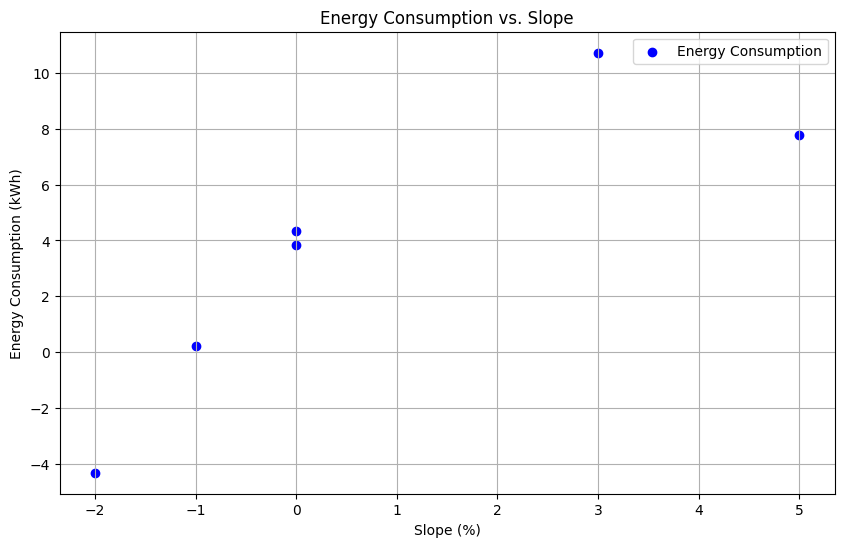

In [20]:
# Eğim ve enerji tüketimi arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(results_df["Slope (%)"], results_df["Energy Consumption (kWh)"], color='b', label='Energy Consumption')
plt.xlabel("Slope (%)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption vs. Slope")
plt.grid(True)
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

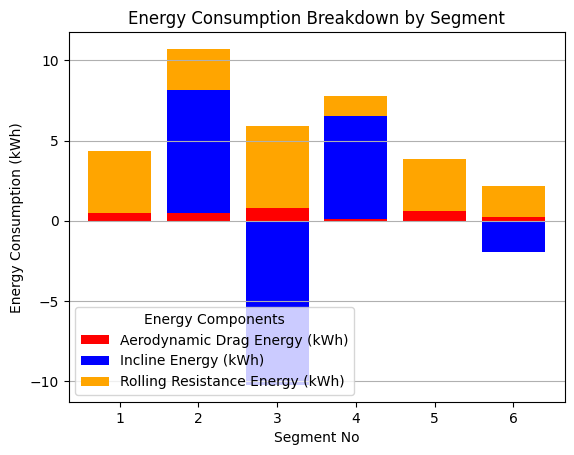

In [22]:
# Enerji bileşenlerini her segment için yığılmış çubuk grafiğiyle gösterme
energy_components = ['Aerodynamic Drag Energy (kWh)', 'Incline Energy (kWh)', 'Rolling Resistance Energy (kWh)']
stacked_data = results_df[energy_components]

# Yığılmış çubuk grafiği
plt.figure(figsize=(10, 6))
stacked_data.plot(kind='bar', stacked=True, color=['red', 'blue', 'orange'], width=0.8)

plt.xlabel("Segment No")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Breakdown by Segment")
plt.xticks(ticks=range(len(results_df)), labels=results_df["Segment No"], rotation=0)
plt.legend(energy_components, title="Energy Components")
plt.grid(True, axis='y')
plt.show()



Enerji Tüketimi Sonuçları (kWh) - Farklı Hız Profilleri:
Slow hız profili: 20.6721 kWh
Medium hız profili: 22.1634 kWh
Fast hız profili: 24.4004 kWh


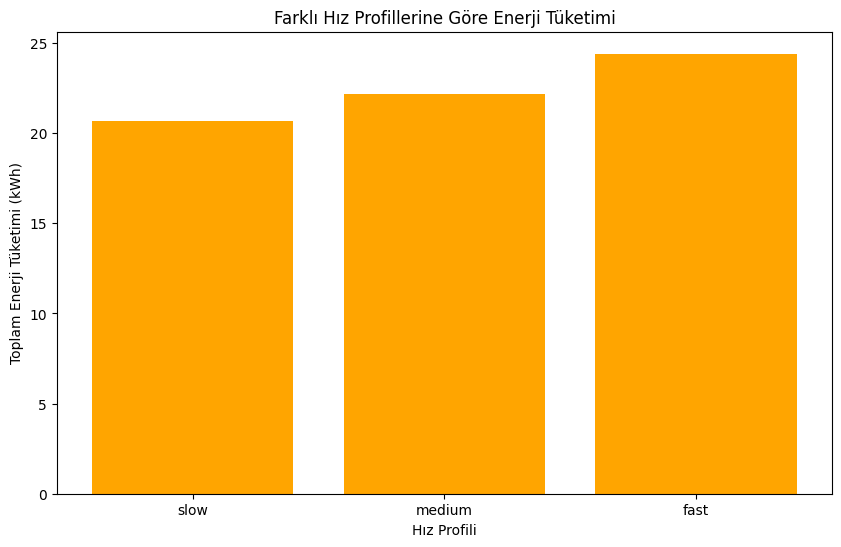

In [23]:
import numpy as np

# Hız Profilleri: segmentlerdeki hızları belirlemek
# Örneğin: 3 farklı hız profili (yavaş, orta, hızlı)
speed_profiles = {
    "slow": 3,  # m/s
    "medium": 5,  # m/s
    "fast": 7,  # m/s
}

# Her segment için alternatif hızda enerji tüketimini hesapla
def calculate_energy_for_speed_profile(speed, segment_data, vehicle_params, air_density):
    energy_consumption = []
    for _, row in segment_data.iterrows():
        length = row["Length (m)"]
        slope = row["Slope (%)"] / 100  # Convert to decimal
        turn_angle = row["Turn Angle (°)"]
        
        # Kuvvet hesaplamaları
        incline_force = vehicle_params["weight_kg"] * g * slope
        rolling_resistance = vehicle_params["weight_kg"] * g * vehicle_params["Cr"]
        aerodynamic_drag = 0.5 * air_density * vehicle_params["Cd"] * vehicle_params["frontal_area_m2"] * speed**2
        
        # Toplam kuvvet ve enerji tüketimi
        total_force = incline_force + rolling_resistance + aerodynamic_drag
        energy = total_force * length / (vehicle_params["motor_efficiency"] * 1000)  # kWh
        energy_consumption.append(energy)
    
    return sum(energy_consumption)

# Farklı hız profilleriyle enerji tüketimini hesapla
results = {}
for profile, speed in speed_profiles.items():
    total_energy = calculate_energy_for_speed_profile(speed, track_data, vehicle_params, air_density)
    results[profile] = total_energy

# Sonuçları yazdır
print("Enerji Tüketimi Sonuçları (kWh) - Farklı Hız Profilleri:")
for profile, energy in results.items():
    print(f"{profile.capitalize()} hız profili: {energy:.4f} kWh")

# Visualize the energy consumption for each speed profile
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='orange')
plt.xlabel("Hız Profili")
plt.ylabel("Toplam Enerji Tüketimi (kWh)")
plt.title("Farklı Hız Profillerine Göre Enerji Tüketimi")
plt.show()
